### 线性回归拟合

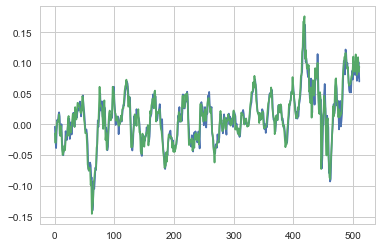

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import tensorflow as tf
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline 
sns.set_style('whitegrid')

tmp = pd.read_csv('F:/QuantPython/MyCodes/ClockWorkRNN/SHCI.csv')
tmp['trading_moment'] = pd.to_datetime(tmp['Unnamed: 0'].values)
tmp.set_index('trading_moment', drop=True, inplace=True)
tmp['Returns'] = np.log(tmp.close.shift(-10)/tmp.close)
tmp.dropna(inplace=True)
tp = np.array(tmp['Returns'])
del tmp['Unnamed: 0']

in_length = 36
out_length = 1
inputs = np.zeros(in_length)
targets = np.zeros(1)
for i in range(len(tp))[in_length:-out_length]:
    m = tp[i-in_length:i]
    R = tp[i:i+1]
    inputs = np.vstack((inputs,m))
    targets = np.vstack((targets,R))
targets = np.delete(targets,0,0)
inputs = np.delete(inputs,0,0)

T_inputs = inputs[:512]
T_targets = targets[:512]

# Parameters
learning_rate = 1e-4
training_epochs = 1e6
display_step = 5000
# tf Graph Input
X = tf.placeholder(dtype=tf.float32, shape=[None, in_length])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 1])
W = tf.Variable(tf.truncated_normal(shape=[in_length,1]))
b = tf.Variable(tf.truncated_normal(shape=[1]))
pred = tf.add(tf.matmul(X, W), b)

cost = tf.reduce_sum(tf.pow(pred-Y, 2))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(np.int(training_epochs)):
        sess.run(optimizer, feed_dict={X:T_inputs, Y:T_targets})
        #if epoch%display_step==0:
        #    print (sess.run(cost, feed_dict={X:T_inputs, Y:T_targets}))
    tmp = sess.run(pred, feed_dict={X:T_inputs})

Tmp = pd.DataFrame(T_targets)
Regression = pd.DataFrame(tmp)
plt.plot(Regression.index, Regression)
plt.plot(Tmp.index, Tmp)

### LSTM

157.438
0.290393
0.249248
0.222183
0.203121
0.189124
0.17913
0.172187
0.167256
0.163519
0.160494
0.15794
0.155745
0.153852
0.152228
0.150856
0.149718
0.148795
0.148057
0.147469
0.146993
0.146592
0.14624
0.145916
0.145606
0.145303
0.145001
0.144697
0.144388
0.144071
0.143744
0.143406
0.143053
0.142683
0.142293
0.14188
0.14144
0.140972
0.140471
0.139936
0.139364
0.138753
0.138104
0.137417
0.136692
0.135934
0.135151
0.134359
0.133582
0.133029
0.132596
0.131927
0.131961
0.131242
0.130899
0.130527
0.130258
0.129783
0.12898
0.128757
0.126623
0.128661
0.127459
0.125471
0.144609
0.126932
0.124969
0.122466
0.120752
0.122507
0.119755
0.12503
0.118375
0.124707
0.118495
0.116275
0.11937
0.197753
0.114211
0.115403
0.113868
0.115838
0.114534
0.114169
0.109047
0.108861
0.109202
0.109969
0.11024
0.109329
0.106943
0.108547
0.106906
0.106827
0.107384
0.117708
0.10643
0.107335
0.106652
0.108171


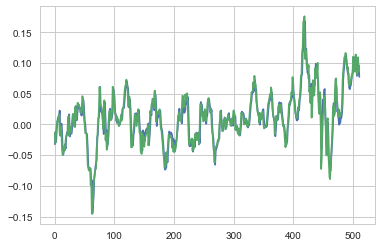

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import tensorflow as tf
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline 
sns.set_style('whitegrid')

tmp = pd.read_csv('F:/QuantPython/MyCodes/ClockWorkRNN/SHCI.csv')
tmp['trading_moment'] = pd.to_datetime(tmp['Unnamed: 0'].values)
tmp.set_index('trading_moment', drop=True, inplace=True)
tmp['Returns'] = np.log(tmp.close.shift(-10)/tmp.close)
tmp.dropna(inplace=True)
tp = np.array(tmp['Returns'])
del tmp['Unnamed: 0']

in_length = 36
out_length = 1
inputs = np.zeros(in_length)
targets = np.zeros(1)
for i in range(len(tp))[in_length:-out_length]:
    m = tp[i-in_length:i]
    R = tp[i:i+1]
    inputs = np.vstack((inputs,m))
    targets = np.vstack((targets,R))
targets = np.delete(targets,0,0)
inputs = np.delete(inputs,0,0)

T_inputs = inputs[:512]
T_targets = targets[:512]

# Parameters
learning_rate = 1e-4
training_epochs = 1e4
batch_size = 512
display_step = 100

in_length = 36
in_width = 1
out_width = 1
hidden_nerous = 360

T_inputs = T_inputs.reshape([batch_size, in_length, in_width])
T_targets = T_targets.reshape([batch_size, out_width])

X = tf.placeholder(dtype=tf.float32, shape=[None, in_length, in_width])
y = tf.placeholder(dtype=tf.float32, shape=[None, out_width])
W = tf.Variable(tf.truncated_normal(shape=[hidden_nerous, out_width]))
b = tf.Variable(tf.truncated_normal(shape=[out_width]))

x = tf.unstack(X,in_length, axis=1)
lstm = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_nerous)
outputs, state = tf.contrib.rnn.static_rnn(lstm, x, dtype=tf.float32)
pred = tf.nn.bias_add(tf.matmul(outputs[-1], W),b)

cost = tf.reduce_sum(tf.square(pred-y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(np.int(training_epochs)):
        sess.run(optimizer, feed_dict={X:T_inputs, y:T_targets})
        if epoch%display_step==0:
            print (sess.run(cost, feed_dict={X:T_inputs, y:T_targets}))
    tmp = sess.run(pred, feed_dict={X:T_inputs})
    
Tmp = pd.DataFrame(T_targets)
LSTM = pd.DataFrame(tmp)
plt.plot(LSTM.index, LSTM)
plt.plot(Tmp.index, Tmp)

### CW-RNN

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import tensorflow as tf
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline 
sns.set_style('whitegrid')

class ClockworkRNN(object):
    def __init__(self,
                 in_length,
                 in_width,
                 out_width,
                 training_epochs=1e2,
                 batch_size=1024,
                 learning_rate=1e-4,
                 hidden_neurons=360,
                 Rb=60,
                 Ti=2,
                 Ti_sum=6,
                 display=1e2):
        # 
        self.in_length = in_length
        self.in_width = in_width
        self.out_width = out_width
        self.batch_size = batch_size    
        self.learning_rate = learning_rate
        self.display = display
        #
        self.hidden_neurons = hidden_neurons
        self.Rb = Rb
        self.Ti = Ti
        self.Ti_sum = Ti_sum
        self.clockwork_periods = [self.Ti**x for x in range(self.Ti_sum)]
        self.training_epochs = training_epochs
        self.inputs = tf.placeholder(dtype=tf.float32, shape=[None, self.in_length, self.in_width], name='inputs')
        self.targets = tf.placeholder(dtype=tf.float32, shape=[None, self.out_width], name='targets')
        #
        self.__inference()   
        
    #  下三角掩码矩阵，处理g-moduels划分形成的上三角权重矩阵
    def __Mask_Matrix(self,W,k):
        length = np.int(W/k)
        tmp = np.ones([W,W])
        for i in range(length)[1:]:
            tmp[i*k:(i+1)*k,:i*k]=0
        tmp[(i+1)*k:,:i*k]=0
        return np.transpose(tmp)
    
    def __inference(self):
        self.sess = sess = tf.InteractiveSession()
        
        # 标准RNN初始权重
        with tf.variable_scope('input_layers'):
            self.WI = tf.get_variable('W', shape=[self.in_width, self.hidden_neurons], initializer=tf.truncated_normal_initializer(stddev=0.1))
            self.bI = tf.get_variable('b', shape=[self.hidden_neurons], initializer=tf.truncated_normal_initializer(stddev=0.1))
        
        traingular_mask = self.__Mask_Matrix(self.hidden_neurons, self.Rb)
        self.traingular_mask = tf.constant(traingular_mask, dtype=tf.float32, name='mask_upper_traingular')
        with tf.variable_scope('hidden_layers'):
            self.WH = tf.get_variable('W', shape=[self.hidden_neurons, self.hidden_neurons], initializer=tf.truncated_normal_initializer(stddev=0.1))
            self.WH = tf.multiply(self.WH, self.traingular_mask)
            self.bH = tf.get_variable('b', shape=[self.hidden_neurons], initializer=tf.truncated_normal_initializer(stddev=0.1))
        
        with tf.variable_scope('output_layers'):
            self.WO = tf.get_variable('W', shape=[self.hidden_neurons, self.out_width], initializer=tf.truncated_normal_initializer(stddev=0.1))
            self.bO = tf.get_variable('b', shape=[self.out_width], initializer=tf.truncated_normal_initializer(stddev=0.1))

        # 输入训练数据转换为列表
        X_list = [tf.squeeze(x, axis=[1]) for x 
                  in tf.split(value=self.inputs, axis=1, num_or_size_splits=self.in_length, name='inputs_list')]
        
        with tf.variable_scope('clockwork_rnn') as scope:
            # 定义初始时刻的隐藏状态，设定为全0
            self.state = tf.get_variable('hidden_sate', shape=[self.batch_size, self.hidden_neurons],initializer=tf.zeros_initializer(),trainable=False)
            for i in range(self.in_length):
                
                # 获取g_moduels索引
                if i>0:
                    scope.reuse_variables()
                g_counter = 0
                for j in range(self.Ti_sum):
                    if i%self.clockwork_periods[j]==0:
                        g_counter += 1
                if g_counter == self.Ti_sum:
                    g_counter = self.hidden_neurons
                else:
                    g_counter *= self.Rb
                
                # t时刻eq1
                tmp_right = tf.matmul(X_list[i], tf.slice(self.WI, [0,0], [-1,g_counter]))
                tmp_right = tf.nn.bias_add(tmp_right, tf.slice(self.bI,[0],[g_counter]))
                self.WH = tf.multiply(self.WH, self.traingular_mask)
                tmp_left = tf.matmul(self.state, tf.slice(self.WH, [0,0], [-1,g_counter]))
                tmp_left = tf.nn.bias_add(tmp_left, tf.slice(self.bH,[0],[g_counter]))
                tmp_hidden = tf.tanh(tf.add(tmp_left, tmp_right))
                
                #更新隐藏状态
                self.state = tf.concat(axis=1, values=[tmp_hidden, tf.slice(self.state, [0, g_counter], [-1,-1])])
            
            self.final_state = self.state
            self.pred = tf.nn.bias_add(tf.matmul(self.final_state, self.WO),self.bO)
            #self.cost_sum = tf.reduce_sum(tf.square(self.targets - self.pred))
            self.cost = tf.reduce_sum(tf.square(self.targets - self.pred))
        self.optimizer = tf.train.AdamOptimizer(self.learning_rate).minimize(self.cost)
        self.sess.run(tf.global_variables_initializer())
            
    def fit(self, inputs, targets):
        sess = self.sess
        for step in range(np.int(self.training_epochs)):
            for i in range(np.int(len(targets)/self.batch_size)):
                batch_x = inputs[i*self.batch_size:(i+1)*self.batch_size].reshape([self.batch_size, self.in_length, self.in_width])
                batch_y = targets[i*self.batch_size:(i+1)*self.batch_size].reshape([self.batch_size, self.out_width])                    
                sess.run(self.optimizer, feed_dict={self.inputs:batch_x, self.targets:batch_y})
            if len(targets)%self.batch_size !=0:
                batch_x = inputs[-self.batch_size:].reshape([self.batch_size, self.in_length, self.in_width])
                batch_y = targets[-self.batch_size:].reshape([self.batch_size, self.out_width])                    
                sess.run(self.optimizer, feed_dict={self.inputs:batch_x, self.targets:batch_y})
            if step%self.display == 0:
                print (sess.run(self.cost, feed_dict={self.inputs:batch_x, self.targets:batch_y}))
            
                
    def prediction(self, inputs):
        sess = self.sess
        tmp = np.zeros(self.out_width)
        for i in range(np.int(len(inputs)/self.batch_size)):    
            batch_x = inputs[i*self.batch_size:(i+1)*self.batch_size].reshape([self.batch_size, self.in_length, self.in_width])
            tmp = np.vstack((tmp,sess.run(self.pred, feed_dict={self.inputs:batch_x})))   
        if len(inputs)%self.batch_size !=0:
            batch_x = inputs[-self.batch_size:].reshape([self.batch_size, self.in_length, self.in_width])
            tp = np.vstack((tmp,sess.run(self.pred, feed_dict={self.inputs:batch_x})))  
            l = len(targets)%self.batch_size
            tp = tp[-l:]
            tmp = np.vstack((tmp,tp))
        tmp = np.delete(tmp,0,0)
        return tmp

109.077
0.525903
0.415223
0.360454
0.331312
0.310329
0.291697
0.274225
0.257874
0.242784
0.229075
0.216817
0.206025
0.196655
0.188613
0.181759
0.17593
0.170951
0.166651
0.162875
0.159494
0.156403
0.153523
0.150798
0.148192
0.145683
0.143258
0.140913
0.138649
0.136467
0.134373
0.132372
0.130468
0.128665
0.126969
0.125381
0.123903
0.132296
0.121347
0.120272
0.119454
0.118454
0.117757
0.117044
0.142842
0.115938
0.11541
0.154321
0.114588
0.114184
0.119643
0.113571
0.113241
0.112945
0.112878
0.112488
0.112249
0.112604
0.11187
0.111673
0.115539
0.111382
0.111219
0.111064
0.111988
0.110819
0.110684
0.110558
0.110525
0.110354
0.110244
0.110177
0.11006
0.10996
0.314878
0.109795
0.109698
0.109606
0.109612
0.109448
0.109358
0.111901
0.1092
0.10911
0.111516
0.108958
0.108851
0.108754
0.108881
0.108577
0.108474
0.108514
0.108279
0.108165
0.122122
0.107956
0.10782
0.107685
0.108927
0.107417
0.107258
0.113976
0.106936
0.106745
0.110004
0.106346
0.106108
0.150203
0.105616
0.105323
0.104995
0.107294
0.

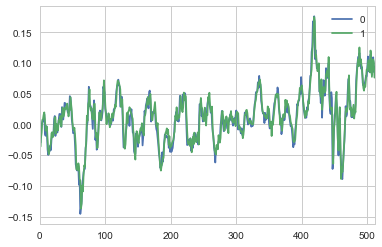

In [4]:
tmp = pd.read_csv('F:/QuantPython/MyCodes/ClockWorkRNN/SHCI.csv')
tmp['trading_moment'] = pd.to_datetime(tmp['Unnamed: 0'].values)
tmp.set_index('trading_moment', drop=True, inplace=True)
tmp['Returns'] = np.log(tmp.close.shift(-10)/tmp.close)
tmp.dropna(inplace=True)
tp = np.array(tmp['Returns'])
del tmp['Unnamed: 0']

in_length = 36
out_length = 1
inputs = np.zeros(in_length)
targets = np.zeros(1)
for i in range(len(tp))[in_length:-out_length]:
    m = tp[i-in_length:i]
    R = tp[i:i+1]
    inputs = np.vstack((inputs,m))
    targets = np.vstack((targets,R))
targets = np.delete(targets,0,0)
inputs = np.delete(inputs,0,0)

T_inputs = inputs[:512]
T_targets = targets[:512]

a = ClockworkRNN(36,1,1,training_epochs=2e4,batch_size=512)
a.fit(T_inputs, T_targets)

outputs = a.prediction(T_inputs)
CW_RNN = outputs
show = pd.DataFrame([T_targets.ravel('C'), outputs.ravel('C')]).T
show.plot()

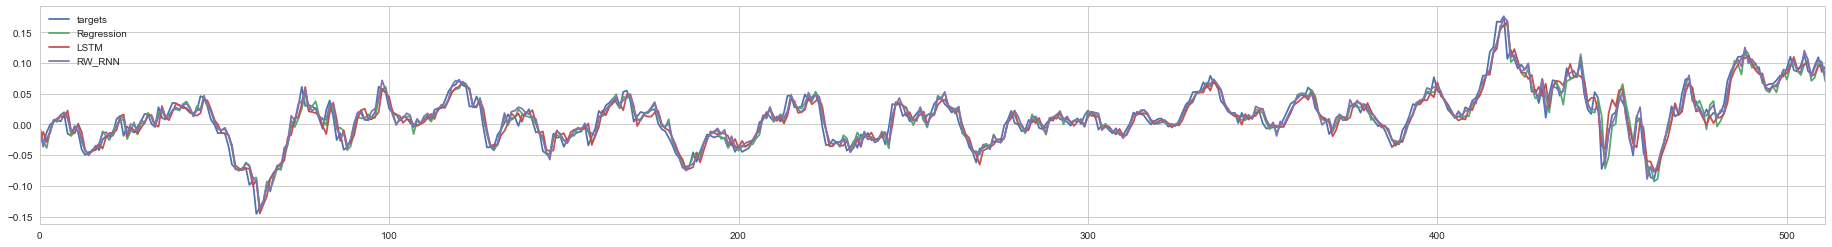

In [5]:
targets = pd.DataFrame(T_targets)
targets.columns = ['targets']
Regression.columns = ['Regression']
CW_RNN = outputs
CW_RNN = pd.DataFrame(CW_RNN)
CW_RNN.columns = ['RW_RNN']
LSTM.columns = ['LSTM']
data = pd.concat([targets, Regression, LSTM, CW_RNN],axis=1)
data.plot(figsize=(32,4))

In [6]:
data.corr()

,targets,Regression,LSTM,RW_RNN
targets,1.000000,0.953152,0.942905,0.965927
Regression,0.953152,1.000000,0.968546,0.986593
LSTM,0.942905,0.968546,1.000000,0.973573
RW_RNN,0.965927,0.986593,0.973573,1.000000


In [7]:
data.describe()

,targets,Regression,LSTM,RW_RNN
count,512.000000,512.000000,512.000000,512.000000
mean,0.012189,0.012189,0.011813,0.013810
std,0.043669,0.041590,0.041554,0.042153
min,-0.145596,-0.140158,-0.144881,-0.137179
25%,-0.014177,-0.011812,-0.011958,-0.010962
50%,0.010994,0.010627,0.010894,0.013071
75%,0.033292,0.032997,0.032862,0.033115
max,0.175986,0.162132,0.168093,0.174857


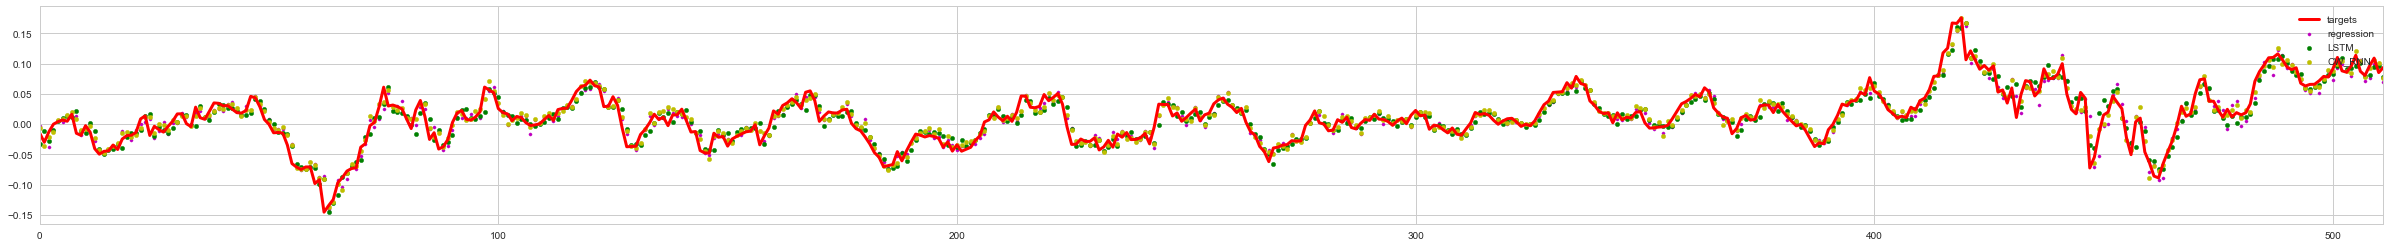

In [8]:
plt.figure(figsize=(42,4))  
plt.plot(targets.index, targets, color='r', linewidth=3, label='targets')
plt.scatter(Regression.index, Regression, color = 'm', label='regression', s = 10)
plt.scatter(LSTM.index, LSTM, color = 'g', label='LSTM', s = 20)
plt.scatter(CW_RNN.index, CW_RNN, color='y', label='CW_RNN', s=20)
plt.xlim(targets.index.min(), targets.index.max())
plt.legend(loc = 'upper right')  
plt.savefig('show.png',dpi=600, frameon=False)

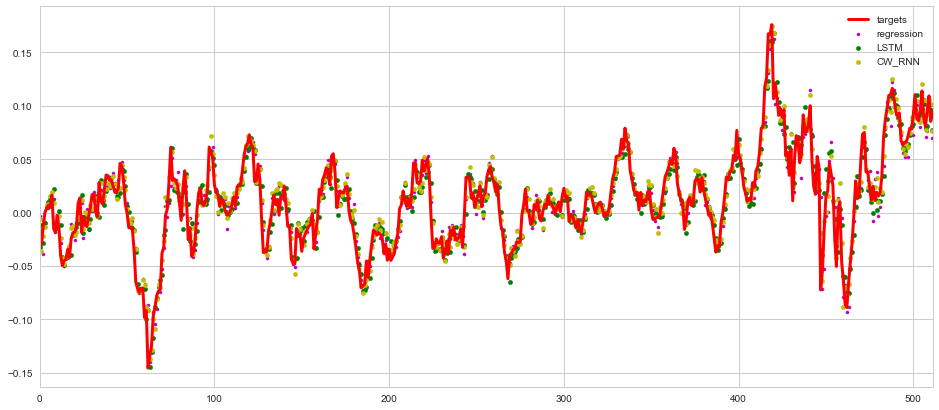

In [10]:
data1 = data
data = data[:64]
plt.figure(figsize=(16,7))  
plt.plot(targets.index, targets, color='r', linewidth=3, label='targets')
plt.scatter(Regression.index, Regression, color = 'm', label='regression', s = 10)
plt.scatter(LSTM.index, LSTM, color = 'g', label='LSTM', s = 20)
plt.scatter(CW_RNN.index, CW_RNN, color='y', label='CW_RNN', s=20)
plt.xlim(targets.index.min(), targets.index.max())
plt.legend(loc = 'upper right')  
plt.savefig('show1.png',dpi=600, frameon=False)